In [154]:
from sklearn.datasets import load_wine
wine = load_wine()

In [155]:
from sklearn.model_selection import train_test_split, GridSearchCV
X, y = wine.data, wine.target
# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

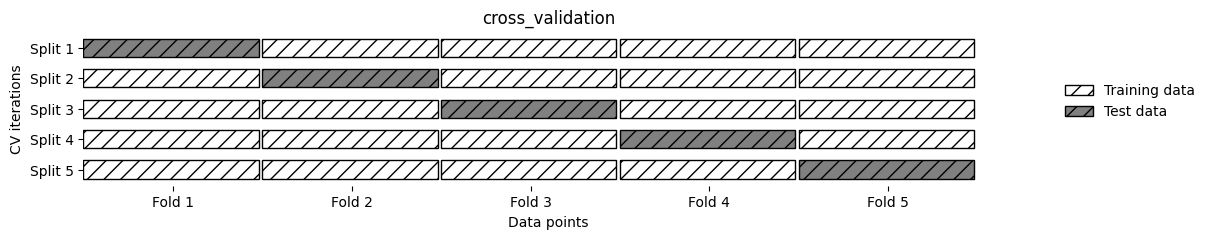

In [156]:
import mglearn
mglearn.plots.plot_cross_validation()

### Перекрестная проверка

In [157]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

logreg = LogisticRegression(solver='liblinear') #использован метод оптимизации liblinear 
scores = cross_val_score(logreg, wine.data, wine.target, cv=5)
print("Cross - validation scores: {}".format(scores))

Cross - validation scores: [0.91666667 0.94444444 0.94444444 1.         1.        ]


In [158]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.96


### Решетчатый поиск с перекрестной проверкой

In [159]:
from sklearn.svm import SVC
# Инициализируем модель Support Vector Classifier 
svc_model = SVC()

In [160]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

# Обучаем модель с лучшими параметрами
best_svc_model = grid_search.best_estimator_
best_svc_model.fit(X_train, y_train)

# Оценка модели на тестовом наборе
y_pred = best_svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность модели на тестовом наборе: {accuracy:.2f}")


Лучшие параметры: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Точность модели на тестовом наборе: 1.00


### Проводим перекрестную проверку для оценки модели

In [161]:
cross_val_scores = cross_val_score(best_svc_model, X, y, cv=5, scoring='accuracy')
print("Точность перекрестной проверки:", np.mean(cross_val_scores))

# Выводим отчет по классификации
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

Точность перекрестной проверки: 0.961111111111111

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



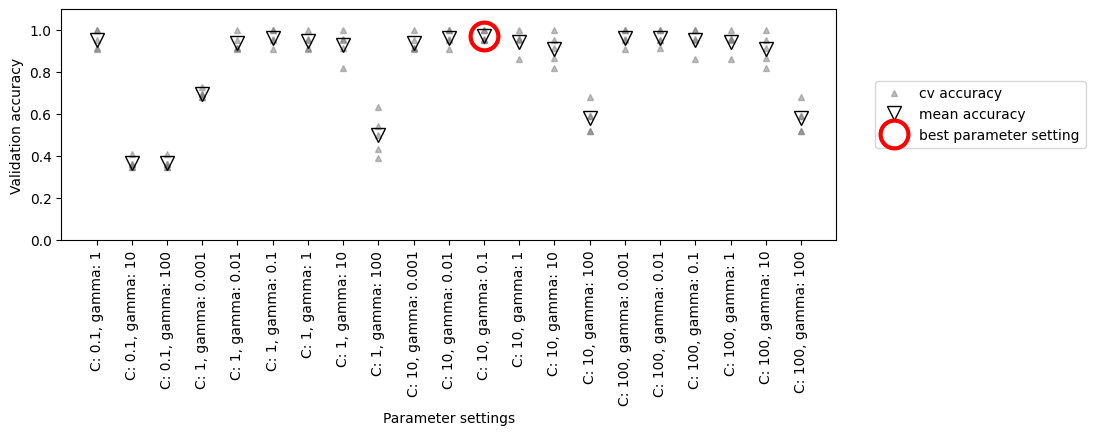

In [162]:
mglearn.plots.plot_cross_val_selection()

###  Тепловая карты (heatmap) с усредненной правильностью перекрестной проверкой

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

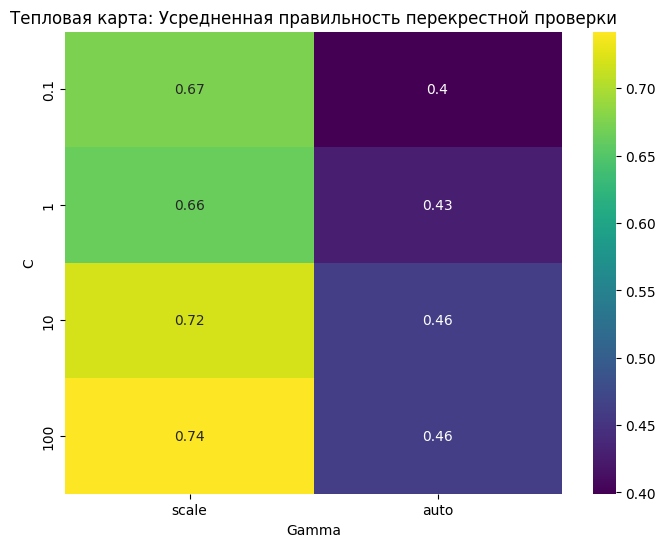

In [164]:

param_C = [0.1, 1, 10, 100]
param_gamma = ['scale', 'auto']

# Создаем сетку параметров для тепловой карты
heatmap_data = np.zeros((len(param_C), len(param_gamma)))


for i, C in enumerate(param_C):
    for j, gamma in enumerate(param_gamma):
        svc_model = SVC(C=C, kernel='rbf', gamma=gamma)
        cross_val_scores = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')
        mean_accuracy = np.mean(cross_val_scores)
        heatmap_data[i, j] = mean_accuracy

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, xticklabels=param_gamma, yticklabels=param_C, cmap='viridis')
plt.title('Тепловая карта: Усредненная правильность перекрестной проверки')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

###	Создание модели классификатора

#### 1. Создаю обственный датасет

In [165]:
import pandas as pd
np.random.seed(42)

my_data = {'salary': [np.random.randint(40000, 80000) for _ in range(1000)],
        'city': [np.random.choice(['Bishkek', 'Naryn', 'Osh', 'Issyk Kul', 'Moscow', 'Almaty']) for _ in range(1000)],
        'age': [np.random.randint(25, 66) for _ in range(1000)],
        'vacation_prefer': [np.random.choice(['Shopping', 'Beach holiday','Hiking']) for _ in range(1000)],
        'transport_prefer': [np.random.choice(['auto', 'plane', 'train']) for _ in range(1000)],
        'target': [np.random.choice(['Istambul', 'Tokyo', 'Kuala Lumpur', 'Nyanchang', 'Antalya']) for _ in range(1000)]}

df = pd.DataFrame(my_data)

### Преобразуем категориальные данные в числовые

In [166]:
df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])


### Выделение признаков (X) и целевой переменной (y) 
Разделение на обучающую и тестовую выборки

In [167]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Выбор модели классификатора (Random Forest Classifier)

In [168]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)


In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Построение pipeline для предобработки данных
numeric_features = ['salary', 'age']
categorical_features = ['city_Bishkek', 'city_Naryn', 'city_Osh', 'city_Issyk Kul', 'city_Moscow', 'city_Almaty',
                        'vacation_prefer_Shopping', 'vacation_prefer_Beach holiday', 'vacation_prefer_Hiking',
                        'transport_prefer_auto', 'transport_prefer_plane', 'transport_prefer_train']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Объединение предобработки и классификации в pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifier)])



### Обучение модели и оценка

In [170]:

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовой выборке: {accuracy:.2f}")

Точность модели на тестовой выборке: 0.23


In [171]:
# Отчет по классификации
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))


Отчет по классификации:
              precision    recall  f1-score   support

     Antalya       0.23      0.20      0.22        50
    Istambul       0.35      0.33      0.34        36
Kuala Lumpur       0.21      0.25      0.23        36
   Nyanchang       0.24      0.25      0.24        40
       Tokyo       0.13      0.13      0.13        38

    accuracy                           0.23       200
   macro avg       0.23      0.23      0.23       200
weighted avg       0.23      0.23      0.23       200



### Предсказание на случайных данных

In [172]:
random_data = {'salary': [50000],
               'age': [40],
               'city_Bishkek': [0],
               'city_Naryn': [1],
               'city_Osh': [0],
               'city_Issyk Kul': [0],
               'city_Moscow': [0],
               'city_Almaty': [0],
               'vacation_prefer_Shopping': [1],
               'vacation_prefer_Beach holiday': [0],
               'vacation_prefer_Hiking': [0],
               'transport_prefer_auto': [1],
               'transport_prefer_plane': [0],
               'transport_prefer_train': [0]}

random_df = pd.DataFrame(random_data)
prediction = model.predict(random_df)

print("\nПредсказание для случайных данных:", prediction)


Предсказание для случайных данных: ['Antalya']
